## 6.6 Sourcing & Analyzing Time-Series Data
### This script contains the following:
#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'pMAeszpsRc_GkjmTyemk'

In [26]:
# Importing the 'Vehicle Miles Traveled' variable.

data = quandl.get("FRED/VMT", authtoken="pMAeszpsRc_GkjmTyemK", transform="cumul", collapse="annual")

In [27]:
data.head(5)

Value
Date                 
2000-12-31   218390.0
2001-12-31   447974.0
2002-12-31   682234.0
2003-12-31   920772.0
2004-12-31  1165801.0

In [28]:
data.shape

(22, 1)

In [29]:
data.columns

Index(['Value'], dtype='object')

In [30]:
type(data)

pandas.core.frame.DataFrame

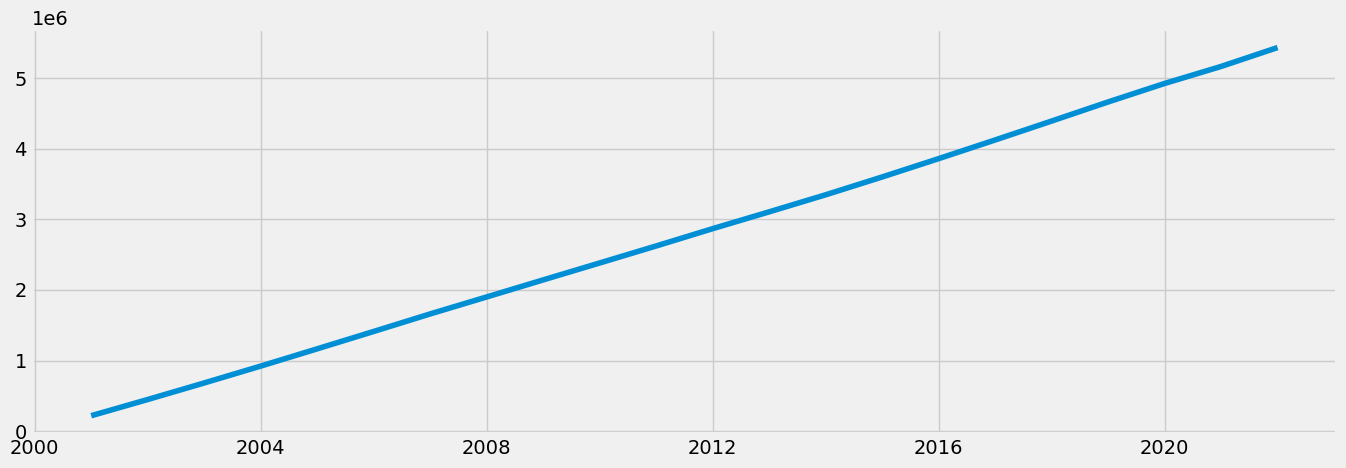

In [31]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

I don't need to create a subset because it doesn't contain any irrelevant historical events or forecasted data.  This data set uses dates from 2000 to 2020, which is a twenty year span and works with my data.

In [32]:
# Check for missing values 

data.isnull().sum() 

Value    0
dtype: int64

In [33]:
# Check for duplicates

dups = data.duplicated()
dups.sum()

0

### 3. Time series analysis: decomposition

In [34]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [35]:
# This will define a fixed size for all special charts.
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

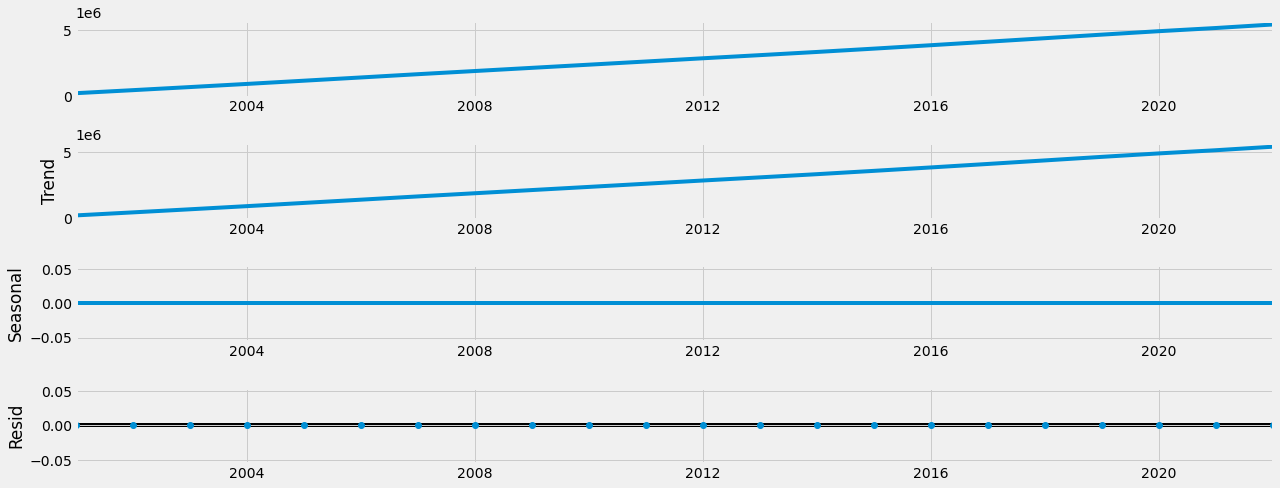

In [36]:
# Plot the separate components

decomposition.plot()
plt.show()

Trend: Historically there's been an increase in vehicle travel miles.
Seasonality/Cycle: The line is straight across, so there is not any seasonality or rises and falls in this data set.
Noise (Residual):There isn't any unexplained noise in this data set. 

### 4. Testing for stationarity

In [37]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  4.765909
p-value                         1.000000
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


The test statistic is larger than the critical value, so I can't reject the null hypothesis. There is a unit root in the data, and the data is non-stationary.

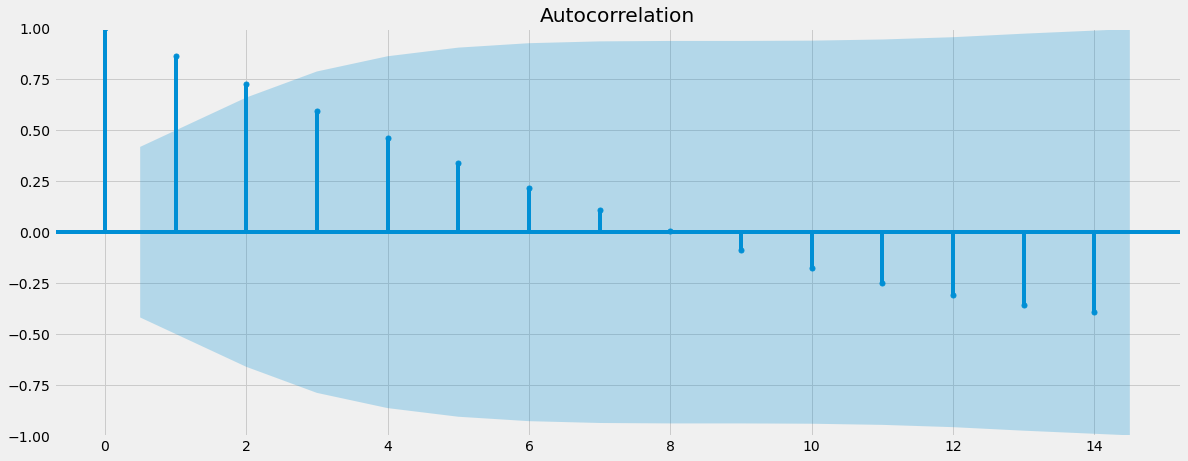

In [52]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

### 5. Stationarizing the Federal Reserve Economic Data

In [60]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = data - data.shift(1) 

In [54]:
# Remove the missing values that came about as a result of the differencing.
data_diff.dropna(inplace = True) 

In [55]:
data_diff.head()

Value
Date                
2001-12-31  229584.0
2002-12-31  234260.0
2003-12-31  238538.0
2004-12-31  245029.0
2005-12-31  245787.0

In [56]:
data_diff.columns

Index(['Value'], dtype='object')

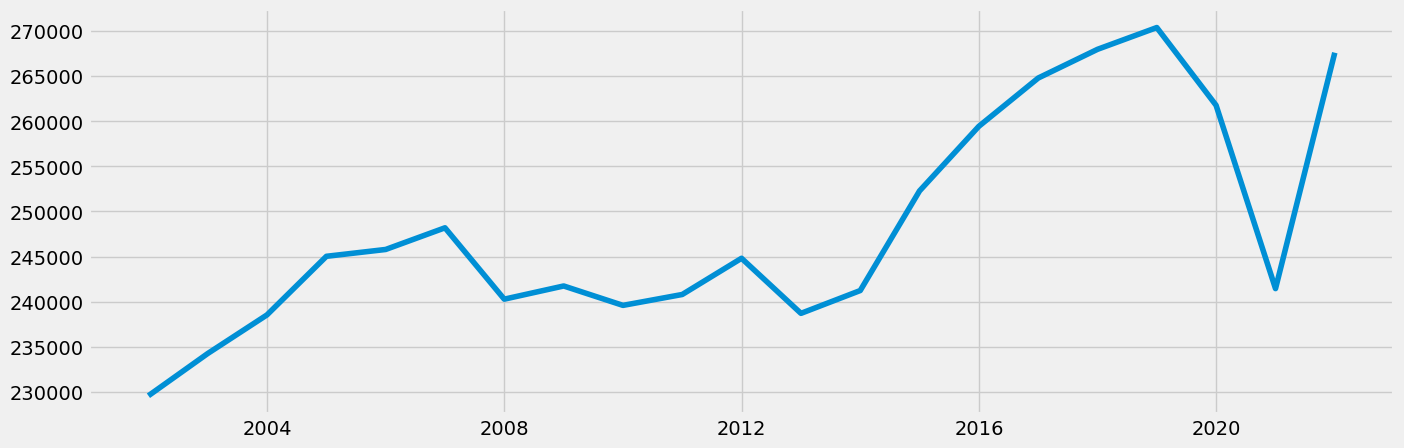

In [57]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [58]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.754451
p-value                         0.403298
Number of Lags Used             0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


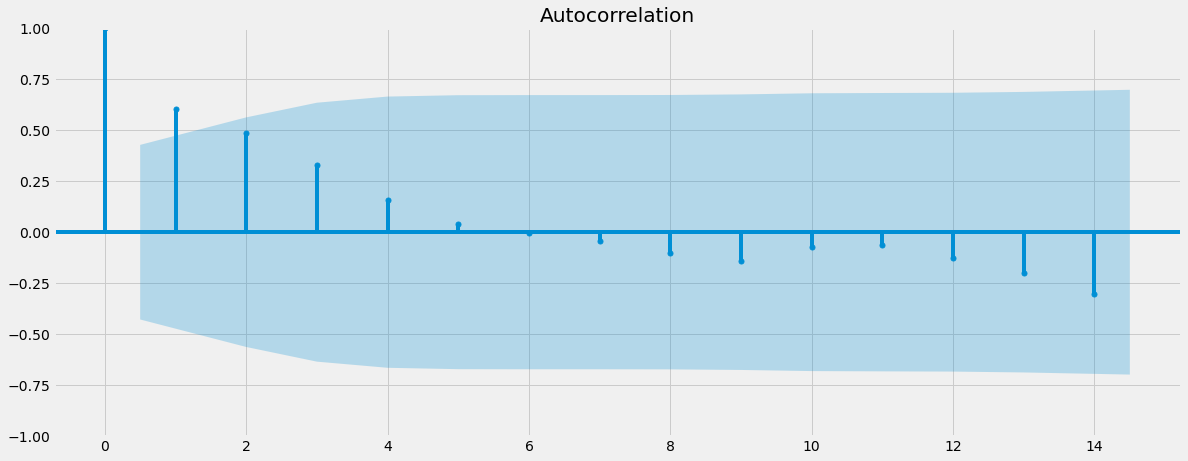

In [59]:
plot_acf(data_diff)
plt.show()

In [61]:
data_diff_2 = data - data.shift(1) 

In [62]:
data_diff_2.dropna(inplace = True) 

In [63]:
data_diff_2.head()

Value
Date                
2001-12-31  229584.0
2002-12-31  234260.0
2003-12-31  238538.0
2004-12-31  245029.0
2005-12-31  245787.0

In [64]:
data_diff_2.columns

Index(['Value'], dtype='object')

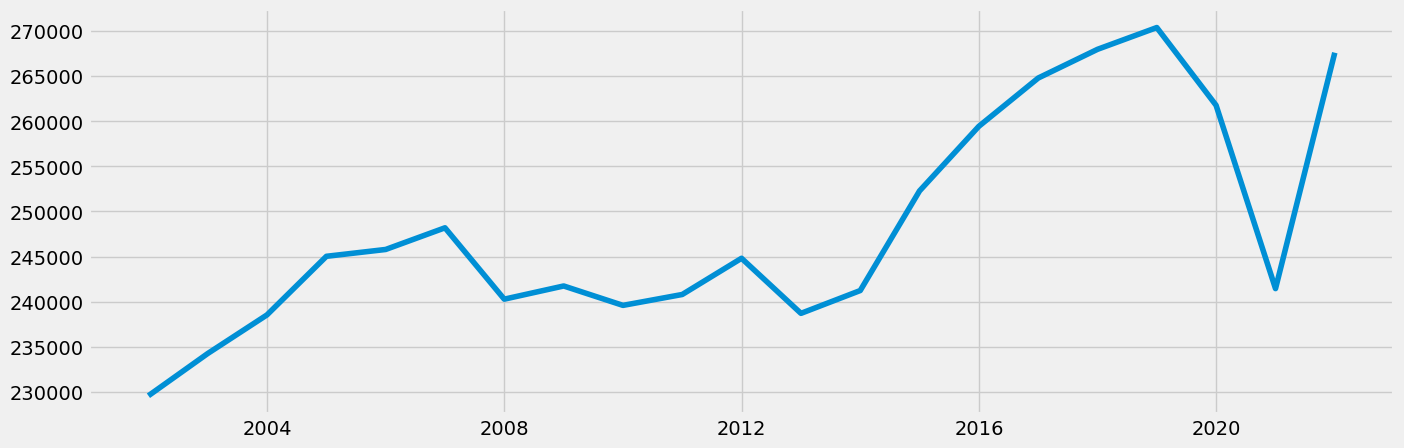

In [65]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [66]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.754451
p-value                         0.403298
Number of Lags Used             0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


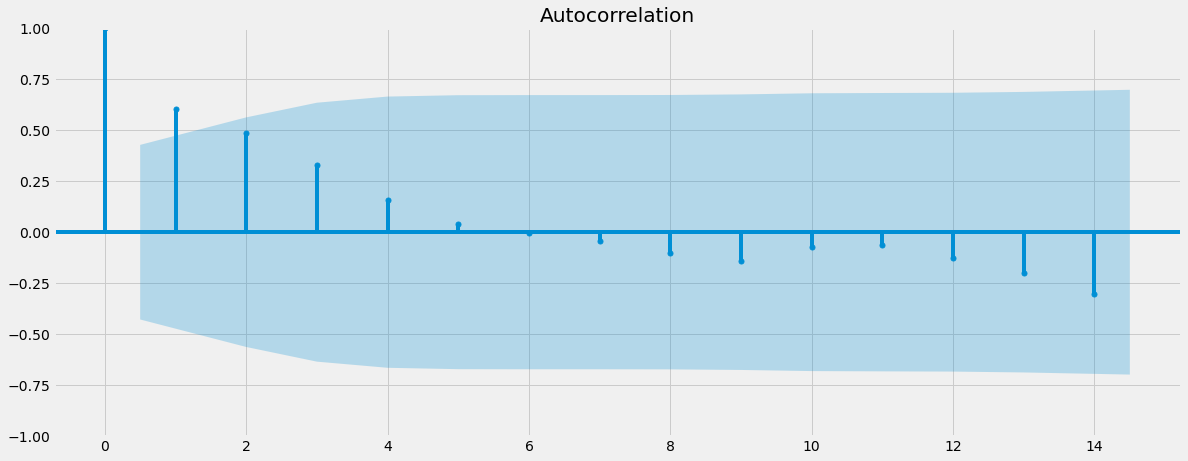

In [67]:
plot_acf(data_diff_2)
plt.show()

I performed 2 rounds of differencing, and it didn't change the values.  The test statistic is still larger than the critical value.